In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
old_df= pd.read_csv('./datasets/synthetic_fraud_data.csv',  parse_dates=['timestamp'], date_format='mixed')
df= old_df[:20000].copy()

### Feature Engineering

In [90]:
df= old_df[:20000].copy()

In [ ]:
''' no needed already transation hour in feature and data also between 2 monhts

df.timestamp= pd.to_datetime(df.timestamp, format= 'mixed')
df['trans_year']= df.timestamp.dt.year
df['trans_month']= df.timestamp.dt.month
df['trans_day']= df.timestamp.dt.day
df['trans_hour']= df.timestamp.dt.hour
df['trans_min']= df.timestamp.dt.minute

'''
# drop timestamp column
# df.drop('timestamp', axis=1, inplace=True)

In [89]:
df.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_min
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,Unknown City,medium,Platinum Credit,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False,2024,9,30,0,0
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,Unknown City,medium,Platinum Credit,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True,2024,9,30,0,0
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,Unknown City,medium,Platinum Credit,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False,2024,9,30,0,0
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,Unknown City,medium,Premium Debit,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False,2024,9,30,0,0
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,Unknown City,medium,Basic Debit,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True,2024,9,30,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   transaction_id       20000 non-null  object             
 1   customer_id          20000 non-null  object             
 2   card_number          20000 non-null  int64              
 3   timestamp            20000 non-null  datetime64[ns, UTC]
 4   merchant_category    20000 non-null  object             
 5   merchant_type        20000 non-null  object             
 6   merchant             20000 non-null  object             
 7   amount               20000 non-null  float64            
 8   currency             20000 non-null  object             
 9   country              20000 non-null  object             
 10  city                 20000 non-null  object             
 11  city_size            20000 non-null  object             
 12  card_type         

In [12]:
df.isna().sum().sum()

0

In [13]:
df.duplicated().sum().sum()

0

In [92]:
new_df= df.copy()
new_df.columns

Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'merchant_category', 'merchant_type', 'merchant', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'card_present', 'device',
       'channel', 'device_fingerprint', 'ip_address', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction',
       'velocity_last_hour', 'is_fraud'],
      dtype='object')

In [93]:
new_df.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,Unknown City,medium,Platinum Credit,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,Unknown City,medium,Platinum Credit,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,Unknown City,medium,Platinum Credit,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,Unknown City,medium,Premium Debit,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,Unknown City,medium,Basic Debit,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True


#### features and label

In [103]:
new_df.merchant_type.value_counts()

merchant_type
online       3712
physical     2476
supplies     1287
medical      1263
major        1262
local        1250
pharmacy     1184
premium       880
fast_food     879
gaming        863
events        831
streaming     816
casual        809
transport     651
hotels        623
booking       619
airlines      595
Name: count, dtype: int64

In [123]:
col_to_drop= ['transaction_id', 'customer_id', 'card_number', 'timestamp', 'ip_address', 'velocity_last_hour']
one_enc= ['merchant_category', 'card_type', 'device', 'channel']
ord_enc= ['city_size']
freq_enc=  ['merchant_type', 'merchant', 'device_fingerprint', 'currency', 'country','city']
label_enc= ['card_present', 'high_risk_merchant', 'weekend_transaction']

num_cols= ['dis_from_home', 'transacton_hr', 'amount']

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler

In [130]:
new_df.drop(col_to_drop, axis=1, inplace=True)

# frequency encoding
for col in freq_enc:
    freq= new_df[col].value_counts()
    new_df[col]= new_df[col].map(freq)

# remaining encoding


In [131]:
X= new_df.drop('is_fraud', axis=1)
y= new_df.is_fraud

In [132]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [135]:
X_train

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
5894,Education,1287,442,4.74,1076,1076,18990,medium,Gold Credit,False,Edge,web,1,1,False,1,False
3728,Grocery,2476,186,326.44,1076,1076,18990,medium,Basic Debit,False,iOS App,mobile,1,1,False,0,False
8958,Healthcare,1263,310,1.98,1017,1017,18990,medium,Premium Debit,False,Edge,web,1,1,False,1,False
7671,Gas,1250,448,31.21,2947,2947,18990,medium,Basic Debit,True,Chip Reader,pos,1,1,False,1,False
5999,Travel,595,90,13035.73,2791,2791,18990,medium,Gold Credit,True,Magnetic Stripe,pos,1,1,True,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Gas,1262,232,6304.45,2791,2791,18990,medium,Platinum Credit,True,Chip Reader,pos,1,1,False,1,False
11964,Travel,619,125,2885298.51,2925,2925,18990,medium,Basic Credit,False,Edge,web,1,1,True,1,False
5390,Grocery,3712,335,221.06,2887,2887,18990,medium,Platinum Credit,True,NFC Payment,pos,1,0,False,1,False
860,Grocery,2476,163,212.60,2887,2887,18990,medium,Basic Debit,False,Android App,mobile,1,1,False,0,False


In [143]:
old_df.city_size.value_counts()

city_size
medium    7284598
large      199168
Name: count, dtype: int64

In [145]:
ct= ColumnTransformer(transformers=[
    ('one-hot', OneHotEncoder(), one_enc),
    ('ordinal', OrdinalEncoder(categories= [['medium', 'large']]), ord_enc),
    # ('bin-value', LabelEncoder(), label_enc)
    
], remainder='passthrough')

le= LabelEncoder()
sc= StandardScaler()

# encode features
X_train_enc= ct.fit_transform(X_train)
X_test_enc= ct.transform(X_test)

# encode label 
y_train_enc= le.fit_transform(y_train)
y_test_enc= le.transform(y_test)

# standardarize 
X_train_enc= sc.fit_transform(X_train_enc)
X_test_enc= sc.transform(X_test_enc)

### Build a model

In [166]:
from sklearn.linear_model import LogisticRegression

In [170]:
model= LogisticRegression()
model.fit(X_train_enc, y_train_enc)


LogisticRegression()

In [172]:
model.score(X_train_enc, y_train_enc), model.score(X_test_enc, y_test_enc)

(0.947875, 0.9475)

In [173]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, ConfusionMatrixDisplay

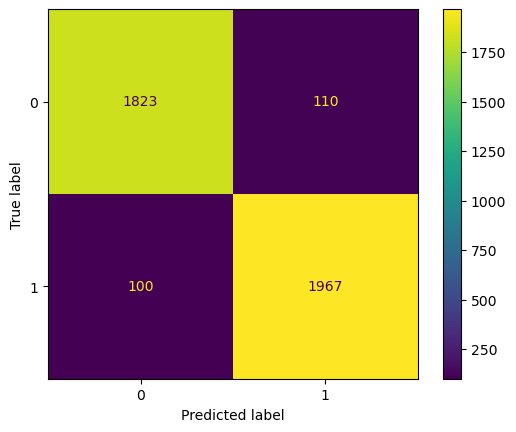

In [176]:
y_pred= model.predict(X_test_enc)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_enc, y_pred)).plot()

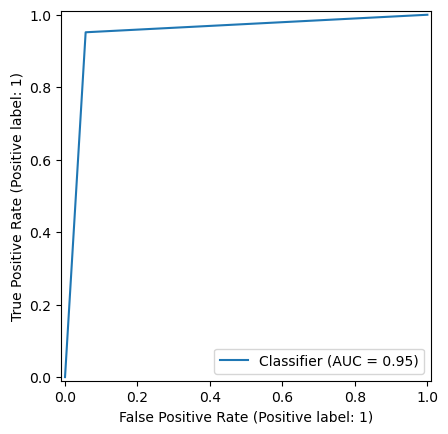

In [177]:
RocCurveDisplay.from_predictions(y_test_enc, y_pred)

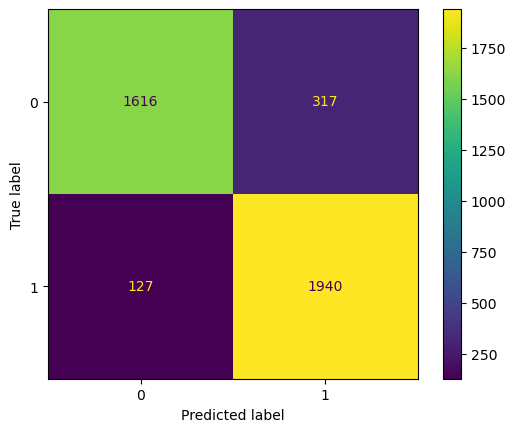

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()

In [ ]:
RocCurveDisplay()